In [1]:
#improting libraries
#importing the libraries
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import climetlab as cml
import xarray as xr
import openpyxl
from windrose import WindroseAxes

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm


import seaborn as sns
sns.set()

import glob
# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
#pip install windrose


In [5]:
#!pip install git+https://github.com/python-windrose/windrose

In [7]:
#ds = cml.load_source('file', 'wind.grib')

In [8]:
#ds= ds.to_xarray()

In [9]:
#u10=ds.u10.values
#v10=ds.v10.values

In [10]:
# Create a cube containing the wind speed.
#windspeed = (ds.u10**2 + ds.v10**2) ** 0.5
#windspeed=windspeed.rename("windspeed")

In [12]:
#angleSpeed = np.tan(ds.v10/ds.u10)
#angleSpeed= angleSpeed.rename("angleSpeed")

In [13]:
#dfAngle= angleSpeed.to_dataframe()

In [14]:
#dfAngle.head()

valid_time  angleSpeed
number time       step   surface latitude longitude                       
0      2021-01-01 0 days 0.0     15.27    -84.77    2021-01-01   -0.585254
                                          -84.02    2021-01-01   -0.529417
                                          -83.27    2021-01-01   -0.385477
                                          -82.52    2021-01-01   -0.289316
                                          -81.77    2021-01-01   -0.198213

In [15]:
#df=windspeed.to_dataframe()

In [16]:
#df['angle']= dfAngle['angleSpeed']

In [17]:
#representation of the wind speed on the x and y axis
#df['speed_x']=df['windspeed']*np.sin(df['angle']*np.pi/180)
#df['speed_y']=df['windspeed']*np.cos(df['angle']*np.pi/180)

In [18]:
#df.head()

valid_time  windspeed  \
number time       step   surface latitude longitude                         
0      2021-01-01 0 days 0.0     15.27    -84.77    2021-01-01   2.401274   
                                          -84.02    2021-01-01   4.240481   
                                          -83.27    2021-01-01   6.727308   
                                          -82.52    2021-01-01   8.902244   
                                          -81.77    2021-01-01   9.612068   

                                                        angle   speed_x  \
number time       step   surface latitude longitude                       
0      2021-01-01 0 days 0.0     15.27    -84.77    -0.585254 -0.024528   
                                          -84.02    -0.529417 -0.039182   
                                          -83.27    -0.385477 -0.045260   
                                          -82.52    -0.289316 -0.044952   
                                          -81.77    -0.198213 -0.033253   

                                                      speed_y  
number time       step   surface latitude longitude            
0      2021-01-01 0 days 0.0     15.27    -84.77     2.401149  
                                          -84.02     4.240300  
                                          -83.27     6.727155  
                                          -82.52     8.902130  
                                          -81.77     9.612011

### Exploratory data analysis

In [19]:
#df.shape

(466560, 5)

In [20]:
#df.describe().T

,count,mean,std,min,25%,50%,75%,max
windspeed,466560.0,3.737738,3.266243,0.002225,1.186310,2.429169,5.565389,16.479275
angle,466560.0,-0.336631,492.573975,-202786.609375,-0.388511,0.196009,0.788890,105694.335938
speed_x,466560.0,0.021109,0.369043,-11.495910,-0.009912,0.008729,0.048839,10.451612
speed_y,466560.0,3.707487,3.279739,-10.870589,1.167691,2.397326,5.525764,16.478964


In [21]:
#df.isnull().sum().sum()

0

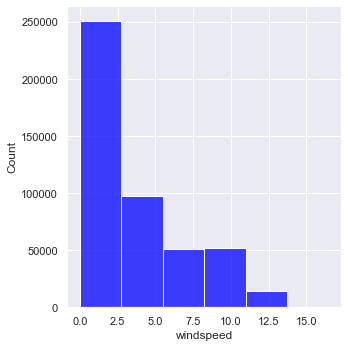

In [22]:
#df.to_csv('/Users/gloriacarrascal/project_wind/wind_dataset.csv',index=False)
#sns.displot(df["windspeed"],kde = False, color = 'blue',bins=6)
#plt.show()

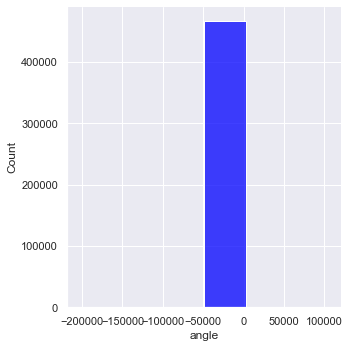

In [23]:
#sns.displot(df["angle"],kde = False, color = 'blue',bins=6)
#plt.show()

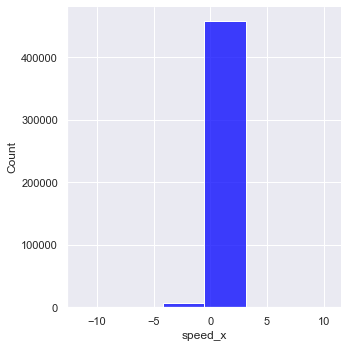

In [24]:
#sns.displot(df["speed_x"],kde = False, color = 'blue',bins=6)
#plt.show()

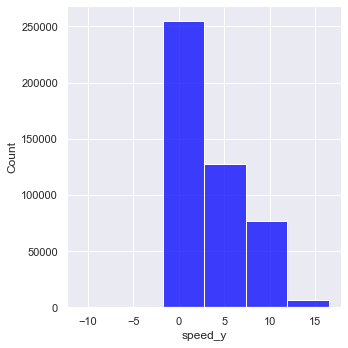

In [25]:
#sns.displot(df["speed_y"],kde = False, color = 'blue',bins=6)
#plt.show()

In [26]:
# compute correlation
#corr_matrix = df.corr()

#corr_matrix

,windspeed,angle,speed_x,speed_y
windspeed,1.000000,-0.000926,0.067017,0.993828
angle,-0.000926,1.000000,0.028431,0.000606
speed_x,0.067017,0.028431,1.000000,0.065450
speed_y,0.993828,0.000606,0.065450,1.000000


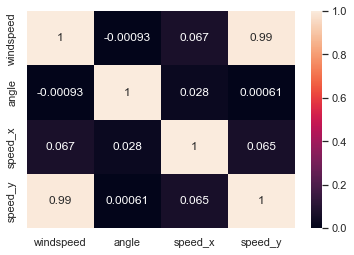

In [27]:
# plot heatmap
# 'annot=True' returns the correlation values 
#sns.heatmap(corr_matrix, annot = True)

# display the plot
#plt.show()

In [224]:
data = pd.read_csv('wind_dataset.csv')
data.head()

,valid_time,windspeed,angle,speed_x,speed_y
0,2021-01-01 00:00:00,2.401274,3.040445,0.127366,2.397894
1,2021-01-01 00:00:00,4.240481,1.906835,0.141099,4.238133
2,2021-01-01 00:00:00,6.727308,0.450945,0.052947,6.727099
3,2021-01-01 00:00:00,8.902244,-0.433688,-0.067383,8.901988
4,2021-01-01 00:00:00,9.612068,2.377939,0.398814,9.603791


In [225]:
#convert valid time in datetime
data['Datetime']=pd.to_datetime(data['valid_time'], format='%Y-%m-%d %H:%M:%S')

In [226]:
#resample by mean by day
data['date']= data["Datetime"].apply(lambda x: x.date())

In [130]:
#resample by hour
#data['hour']= data["Datetime"].apply(lambda x: x.hour)

In [227]:
_dfDay=data
_dfDay= _dfDay.drop(['valid_time'], axis=1)

In [228]:
_dfDay.head()

,windspeed,angle,speed_x,speed_y,Datetime,date
0,2.401274,3.040445,0.127366,2.397894,2021-01-01,2021-01-01
1,4.240481,1.906835,0.141099,4.238133,2021-01-01,2021-01-01
2,6.727308,0.450945,0.052947,6.727099,2021-01-01,2021-01-01
3,8.902244,-0.433688,-0.067383,8.901988,2021-01-01,2021-01-01
4,9.612068,2.377939,0.398814,9.603791,2021-01-01,2021-01-01


In [229]:
#resample, get mean by day
_dfDay= _dfDay.set_index('date')

In [230]:
#be sure that is a format datetime before resmaple
_dfDay.index = pd.to_datetime(_dfDay.index)

In [231]:
#make the resample
_dfDay=_dfDay.resample(rule='D').mean()

In [232]:
#writting the mean by week
_dfDay=_dfDay.resample(rule='W').mean()

In [233]:
_dfDay.shape

(14, 4)

In [304]:
list_number=[x for x in range(1,15)]
list_number

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [305]:
img_name=[('week'+str(i)+'.png') for i in list_number]

In [306]:
img_name

['week1.png',
 'week2.png',
 'week3.png',
 'week4.png',
 'week5.png',
 'week6.png',
 'week7.png',
 'week8.png',
 'week9.png',
 'week10.png',
 'week11.png',
 'week12.png',
 'week13.png',
 'week14.png']

In [307]:
_dfDay['url']=img_name

In [309]:
_dfDay.to_csv('/Users/gloriacarrascal/project_wind/wind/_wind.csv',index=False)

In [221]:
_dfDay[]

,windspeed,angle,speed_x,speed_y
date,,,,
2021-03-27,4.108154,0.022410,0.015366,4.054676
2021-03-28,4.131433,-0.437283,0.017809,4.078736
2021-03-29,4.119490,2.293891,-0.009359,4.034019
2021-03-30,4.160324,6.529856,0.006470,4.068868
2021-03-31,4.020786,-0.044188,-0.021777,3.947997


0
            windspeed     angle   speed_x   speed_y
date                                               
2021-01-01   4.079895 -6.570117  0.010094  4.023129
2021-01-02   4.505474 -0.080200  0.007823  4.426185
2021-01-03   4.471615  1.895521 -0.003821  4.409224
2021-01-04   3.929402  0.825081 -0.000323  3.853691
2021-01-05   3.611120  0.271731  0.012539  3.544011
2021-01-06   3.145579 -0.842128  0.002938  3.094657


<Figure size 504x504 with 0 Axes>

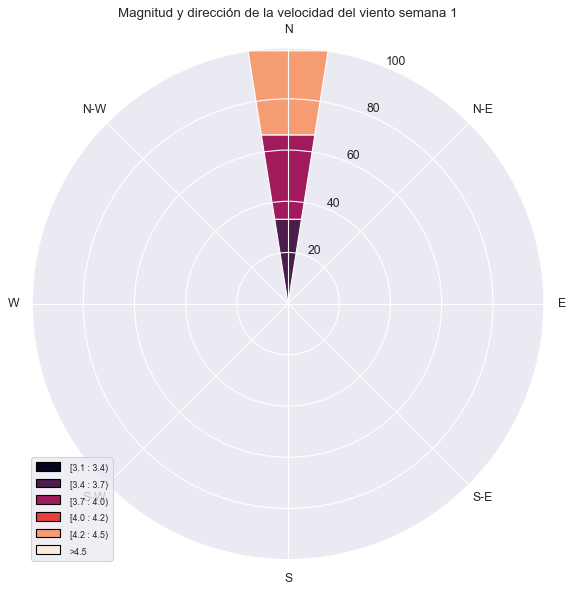

1
            windspeed     angle   speed_x   speed_y
date                                               
2021-01-07   3.048366 -0.989642 -0.010932  2.979129
2021-01-08   3.175772 -0.994157  0.012611  3.131353
2021-01-09   3.254549  2.424477  0.017802  3.207924
2021-01-10   3.619520  0.736481  0.013594  3.557333
2021-01-11   4.083700  0.440687 -0.006990  4.012354
2021-01-12   4.375968  0.413682  0.005782  4.321242


<Figure size 504x504 with 0 Axes>

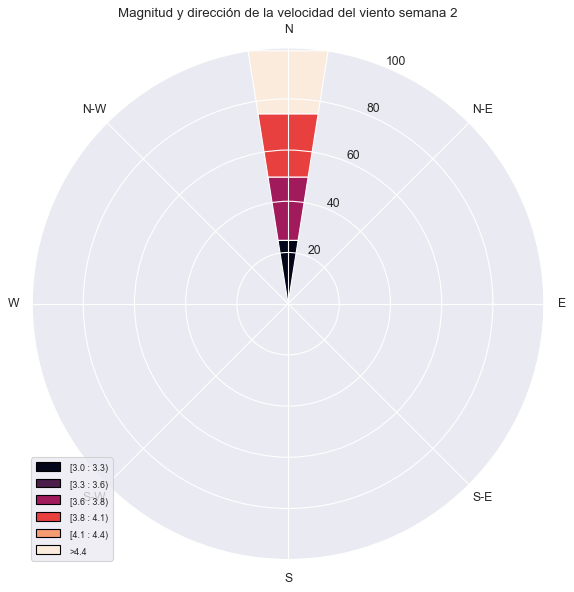

2
            windspeed      angle   speed_x   speed_y
date                                                
2021-01-13   4.123074  36.215995 -0.000824  4.051851
2021-01-14   3.851083 -18.094800  0.018207  3.790002
2021-01-15   3.609477   0.165496  0.024460  3.546087
2021-01-16   3.437003   0.520287  0.023866  3.396443
2021-01-17   3.547027   2.294931  0.015735  3.481046
2021-01-18   3.739336  -0.292690  0.025444  3.684482


<Figure size 504x504 with 0 Axes>

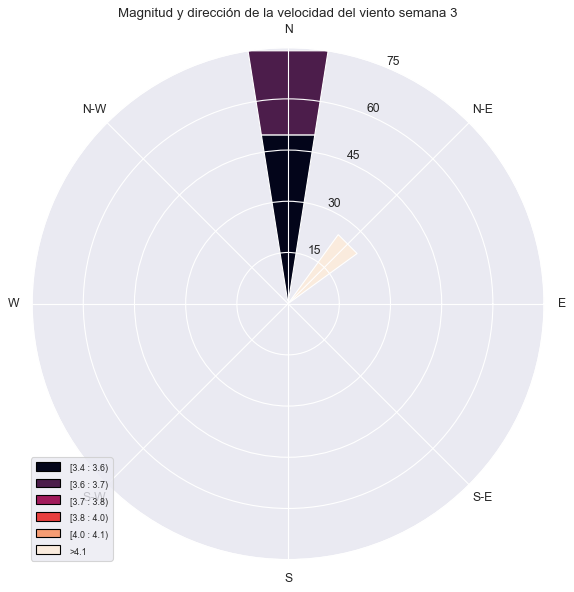

3
            windspeed     angle   speed_x   speed_y
date                                               
2021-01-19   4.284114 -1.417661 -0.010056  4.215680
2021-01-20   4.302556 -0.662808  0.038121  4.236869
2021-01-21   3.997812  1.301928  0.016510  3.906475
2021-01-22   3.415610 -1.834890  0.001498  3.343443
2021-01-23   3.334723 -4.826745 -0.018106  3.256141
2021-01-24   3.572789  0.517529 -0.006270  3.531898


<Figure size 504x504 with 0 Axes>

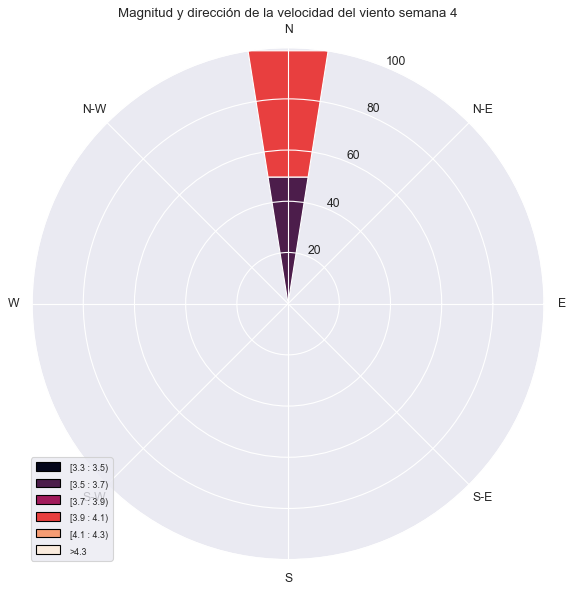

4
            windspeed     angle   speed_x   speed_y
date                                               
2021-01-25   3.791139 -0.893447 -0.006276  3.737055
2021-01-26   4.217866 -1.984891 -0.014184  4.162341
2021-01-27   3.965871  3.436400  0.002578  3.883700
2021-01-28   3.952157  2.115182  0.011866  3.875181
2021-01-29   4.009594  1.564432  0.040130  3.951805
2021-01-30   4.413751 -6.578225  0.028474  4.349341


<Figure size 504x504 with 0 Axes>

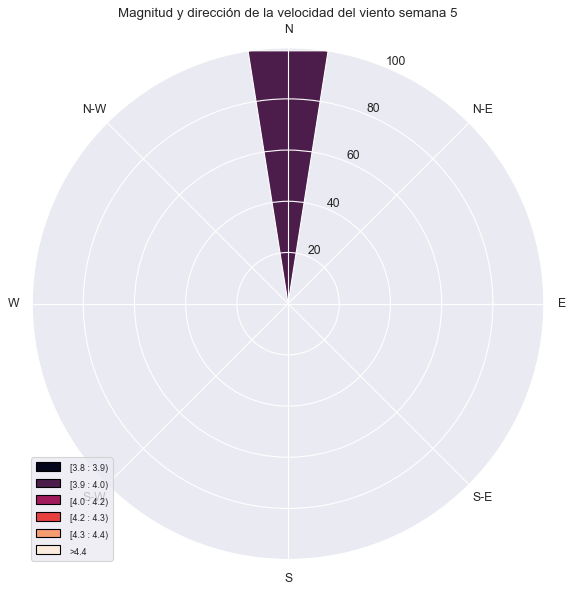

5
            windspeed     angle   speed_x   speed_y
date                                               
2021-01-31   4.404562  0.044654  0.013829  4.335331
2021-02-01   3.911352  0.454899  0.037583  3.846932
2021-02-02   3.607861  0.371699  0.010256  3.574626
2021-02-03   3.940964  0.101460  0.018428  3.912538
2021-02-04   3.865012 -1.798957  0.015818  3.824847
2021-02-05   3.582118 -0.182905  0.016872  3.537771


<Figure size 504x504 with 0 Axes>

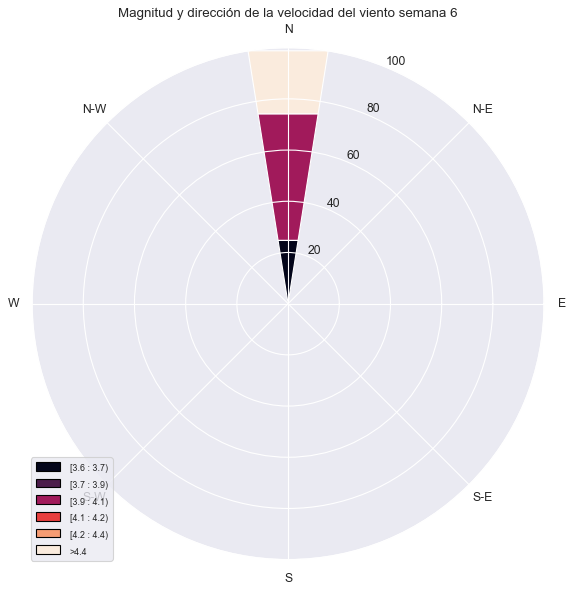

6
            windspeed     angle   speed_x   speed_y
date                                               
2021-02-06   3.502708 -0.101501  0.006521  3.435890
2021-02-07   3.755814  4.678587  0.016087  3.661999
2021-02-08   3.860746  0.433693  0.004541  3.811572
2021-02-09   3.869432 -0.412236  0.013200  3.813901
2021-02-10   3.630023  0.525333 -0.004966  3.548983
2021-02-11   3.605355  0.361633  0.002618  3.554221


<Figure size 504x504 with 0 Axes>

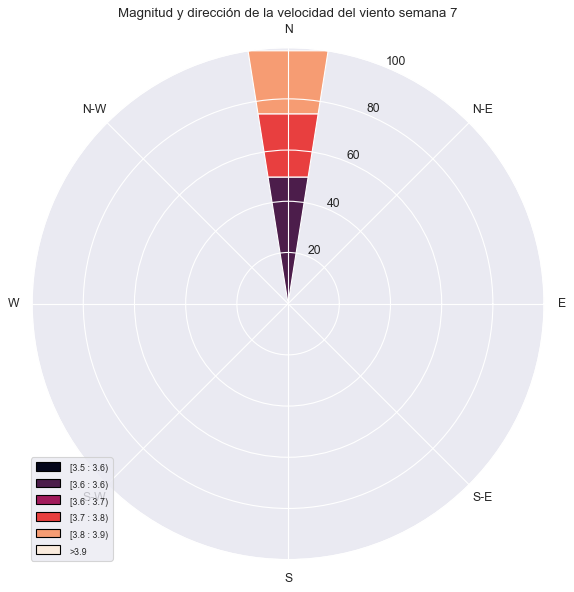

7
            windspeed     angle   speed_x   speed_y
date                                               
2021-02-12   3.609957 -0.201676  0.000734  3.564608
2021-02-13   3.305989 -0.181792 -0.003291  3.251813
2021-02-14   3.045692 -0.061568  0.013270  3.006189
2021-02-15   3.488078  0.741008  0.007570  3.431120
2021-02-16   3.697067 -0.381388  0.006338  3.651293
2021-02-17   3.923950  0.035922  0.008554  3.885894


<Figure size 504x504 with 0 Axes>

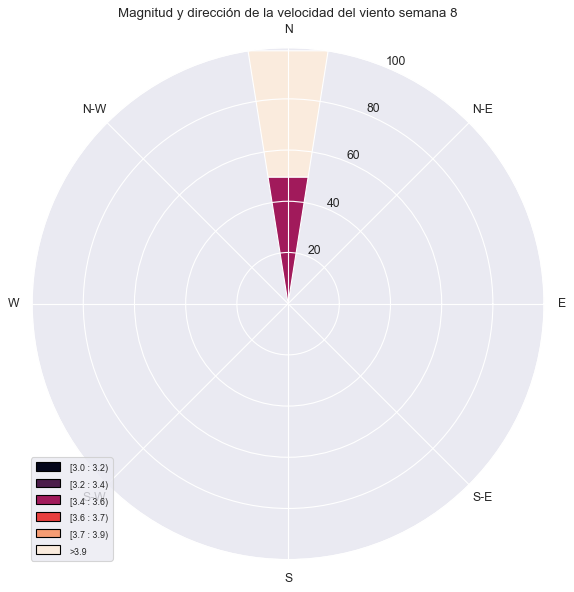

8
            windspeed     angle   speed_x   speed_y
date                                               
2021-02-18   4.059254 -0.146139  0.005808  3.978844
2021-02-19   3.712377  0.058553  0.004356  3.665213
2021-02-20   3.593258 -0.966074  0.019928  3.525314
2021-02-21   3.649908  0.717866  0.026932  3.582728
2021-02-22   3.873243 -5.999891  0.023409  3.788159
2021-02-23   3.908954 -7.379091  0.007563  3.841203


<Figure size 504x504 with 0 Axes>

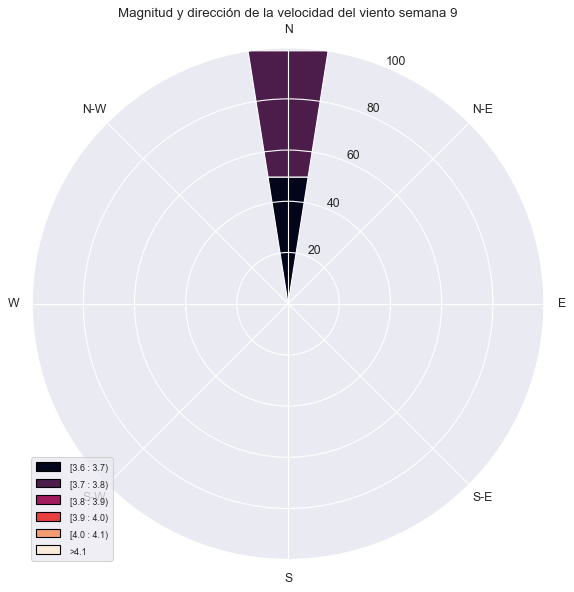

9
            windspeed      angle   speed_x   speed_y
date                                                
2021-02-24   4.183823  12.505296 -0.017126  4.116927
2021-02-25   4.356089  -0.544130  0.004578  4.278017
2021-02-26   4.400993   0.603430  0.017357  4.318053
2021-02-27   4.160579  -0.695885  0.005418  4.088660
2021-02-28   4.451160  -0.144076  0.005761  4.393408
2021-03-01   4.287449  20.909323  0.006186  4.202902


<Figure size 504x504 with 0 Axes>

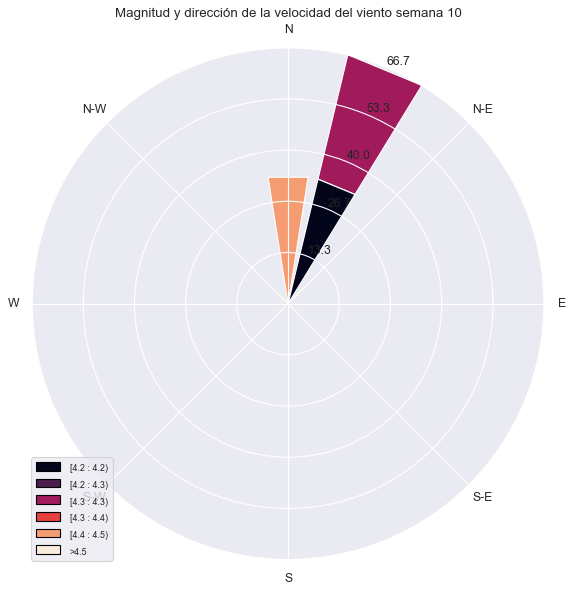

10
            windspeed     angle   speed_x   speed_y
date                                               
2021-03-02   3.725668  0.572537 -0.004931  3.672762
2021-03-03   3.576532 -0.955138 -0.010734  3.512998
2021-03-04   3.389313  2.540269  0.023848  3.327051
2021-03-05   3.180831 -0.573244  0.027926  3.138447
2021-03-06   3.260111 -0.783308  0.003397  3.225444
2021-03-07   3.625904  0.332552  0.024396  3.579981


<Figure size 504x504 with 0 Axes>

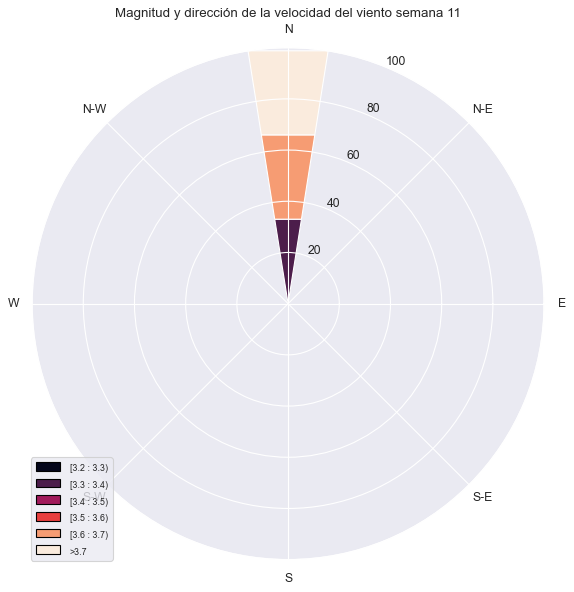

11
            windspeed     angle   speed_x   speed_y
date                                               
2021-03-08   3.925939  1.012649  0.022400  3.876001
2021-03-09   3.916172 -0.434530  0.046302  3.824317
2021-03-10   3.678897 -0.876312  0.025385  3.596791
2021-03-11   3.220595 -0.915252  0.011964  3.161732
2021-03-12   3.051950  0.103388  0.033027  2.960416
2021-03-13   3.281631  1.696334  0.028383  3.203309


<Figure size 504x504 with 0 Axes>

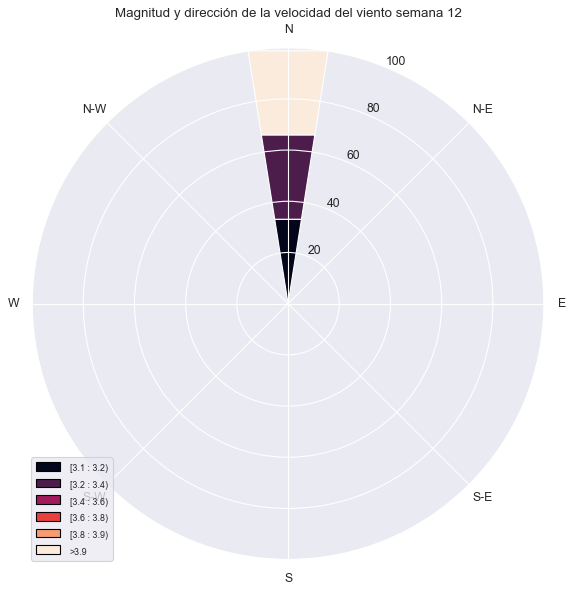

12
            windspeed     angle   speed_x   speed_y
date                                               
2021-03-14   3.210696 -0.929002 -0.006570  3.159916
2021-03-15   3.304657  7.868439  0.003683  3.255251
2021-03-16   3.565741 -0.856439 -0.009904  3.499501
2021-03-17   3.586589  0.249918  0.001533  3.528201
2021-03-18   3.486214  1.598882  0.011741  3.436003
2021-03-19   3.209623 -0.486963 -0.016946  3.131440


<Figure size 504x504 with 0 Axes>

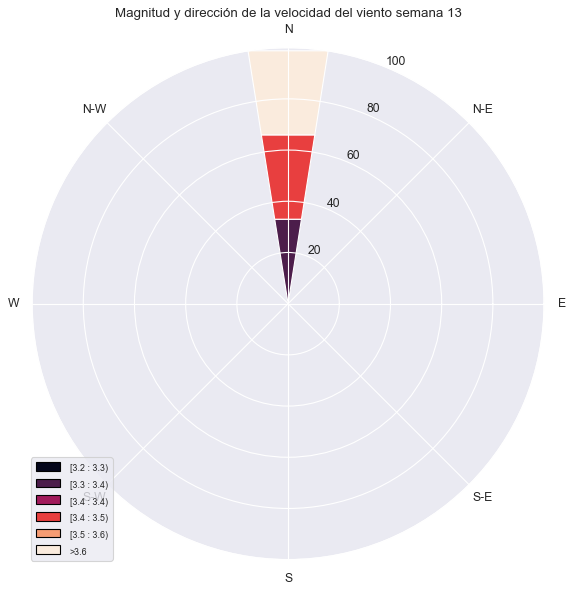

13
            windspeed     angle   speed_x   speed_y
date                                               
2021-03-20   3.559888  0.360564  0.019498  3.517325
2021-03-21   3.583608 -1.491456  0.026038  3.530598
2021-03-22   3.393520  2.257407  0.002553  3.337601
2021-03-23   2.831491  0.905585  0.002289  2.785843
2021-03-24   2.969508  0.274262  0.001286  2.924463
2021-03-25   3.406171  0.474612 -0.008282  3.338655


<Figure size 504x504 with 0 Axes>

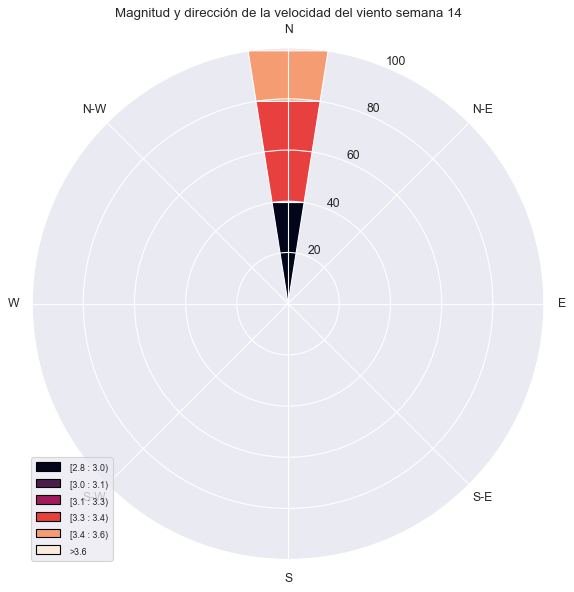

14
            windspeed     angle   speed_x   speed_y
date                                               
2021-03-26   3.802107 -4.822103  0.006875  3.751307
2021-03-27   4.108154  0.022410  0.015366  4.054676
2021-03-28   4.131433 -0.437283  0.017809  4.078736
2021-03-29   4.119490  2.293891 -0.009359  4.034019
2021-03-30   4.160324  6.529856  0.006470  4.068868
2021-03-31   4.020786 -0.044188 -0.021777  3.947997


<Figure size 504x504 with 0 Axes>

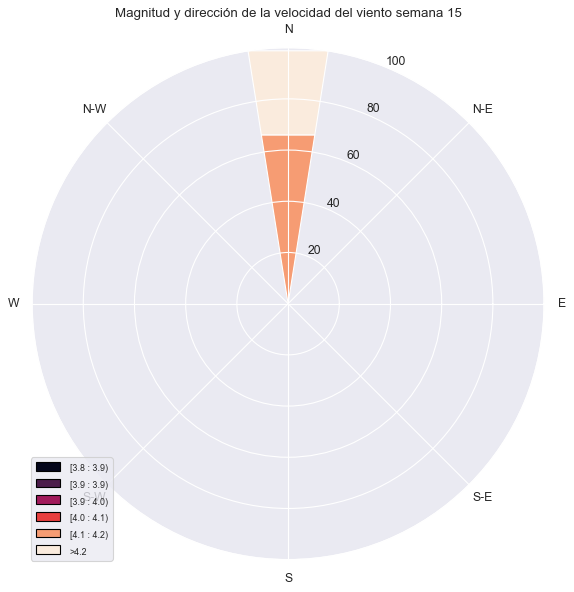

15


IndexError: index 90 is out of bounds for axis 0 with size 90

In [223]:
#slice in a interval time to check the grahp
dates= _dfDay.index.values
#making the wind rose(the mean for all interval time)
item2=6
item1=0
week=1
for date in range(len(dates)):
    print(date)
    #print(date)
    _df= _dfDay.loc[dates[item1]:dates[item2-1]]
    print(_df)
    item2+=6
    item1+=6
    #print(_df)
    plt.figure(figsize=(7,7))
    ax= WindroseAxes.from_ax()
    ax.bar(_df.angle, _df.windspeed, normed=True, opening=0.8, edgecolor='white')
    plt.title(f'Magnitud y dirección de la velocidad del viento semana {week}')
    ax.set_legend()
    _df=pd.DataFrame()
    #plt.savefig(f'/Users/gloriacarrascal/project_wind/wind/static/week{week}.png', bbox_inches='tight', dpi = 1000)
    plt.show()
    week+=1
    

### working with time by hour... 
- plot rose by hour
- plot time serie, mean by hour during the interval time

In [23]:
#new data
_dfHour= data
_dfHour.head()

,valid_time,windspeed,angle,speed_x,speed_y,Datetime,date,hour
0,2021-01-01 00:00:00,2.401274,3.040445,0.127366,2.397894,2021-01-01,2021-01-01,0
1,2021-01-01 00:00:00,4.240481,1.906835,0.141099,4.238133,2021-01-01,2021-01-01,0
2,2021-01-01 00:00:00,6.727308,0.450945,0.052947,6.727099,2021-01-01,2021-01-01,0
3,2021-01-01 00:00:00,8.902244,-0.433688,-0.067383,8.901988,2021-01-01,2021-01-01,0
4,2021-01-01 00:00:00,9.612068,2.377939,0.398814,9.603791,2021-01-01,2021-01-01,0


In [24]:
_dfHour= _dfHour.set_index('Datetime')
#be sure that is a format datetime before resmaple
_dfHour.index = pd.to_datetime(_dfHour.index)

In [25]:
#resampling by mean by hour
_dfHour = _dfHour.resample('H').mean()

In [26]:
_dfHour.head()

,windspeed,angle,speed_x,speed_y,hour
Datetime,,,,,
2021-01-01 00:00:00,3.866304,-0.210007,-0.004035,3.842388,0.0
2021-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN
2021-01-01 03:00:00,3.975585,-0.038807,0.018470,3.893891,3.0
2021-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN


In [30]:
#plotting time serie
_plot = _dfHour[_dfHour['windspeed'].isnull()==False]
_plot

,windspeed,angle,speed_x,speed_y,hour
Datetime,,,,,
2021-01-01 00:00:00,3.866304,-0.210007,-0.004035,3.842388,0.0
2021-01-01 03:00:00,3.975585,-0.038807,0.018470,3.893891,3.0
2021-01-01 06:00:00,3.898204,-0.487578,0.009132,3.829311,6.0
2021-01-01 09:00:00,3.927821,-49.559141,0.050550,3.866349,9.0
2021-01-01 12:00:00,3.850754,1.766930,0.031123,3.793969,12.0
...,...,...,...,...,...
2021-03-31 09:00:00,3.852355,2.028094,-0.001457,3.801396,9.0
2021-03-31 12:00:00,3.906055,1.932683,-0.043355,3.827042,12.0
2021-03-31 15:00:00,4.124739,-0.840381,-0.017616,4.015730,15.0


In [33]:
_plot = _plot.resample('W').mean()

Text(0, 0.5, 'Velocidad del viento ms-2')

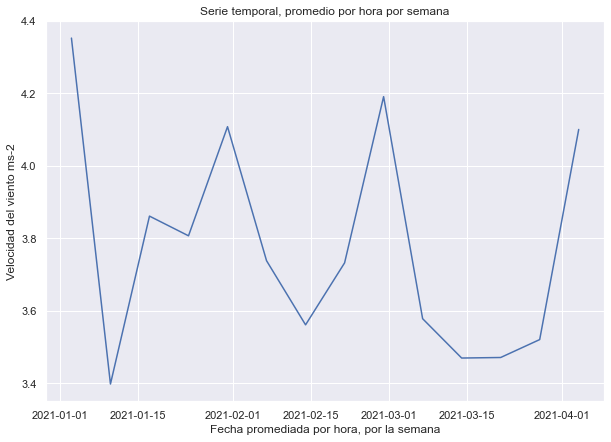

In [58]:
#_df = _plot.loc['2021-01-01':'2021-01-03']
plt.figure(figsize=(10,7))
plt.plot(_plot.index, _plot['windspeed'])
plt.title('Serie temporal, promedio por hora por semana')
plt.xlabel('Fecha promediada por hora, por la semana')
plt.ylabel('Velocidad del viento ms-2')


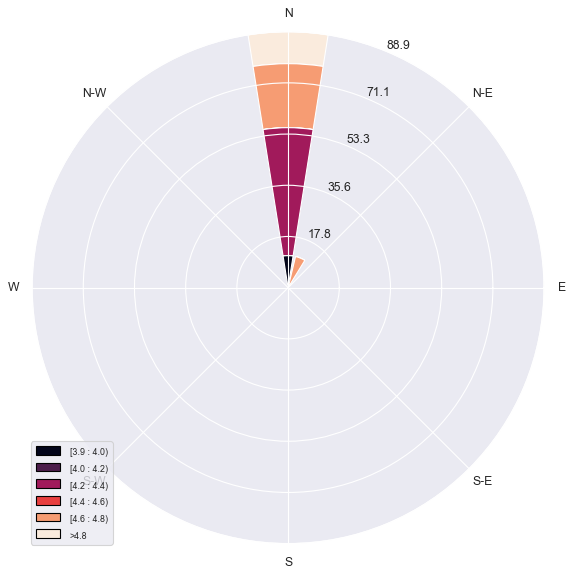

In [123]:
#making the wind rose(the mean for all interval time)
ax= WindroseAxes.from_ax()
ax.bar(_df.angle, _df.windspeed, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()


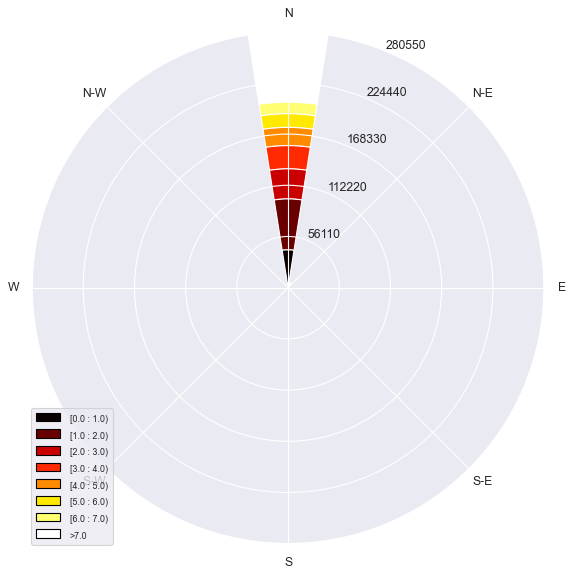

In [121]:
#making the wind rose(the mean for all interval time) filled mode
ax= WindroseAxes.from_ax()
ax.bar(df.angle, df.windspeed,
       bins=np.arange(0,8,1), cmap=cm.hot)
ax.set_legend()



### setting for a given time interval-(the visualization should be the mean for any time interval)
- Setting the column valid time as timestamp
- slice the pandas, 
- Reanrange in this columns
- calculate the mean general
- show the graph


In [119]:
#making a grahp
#cml.plot_map(ds, title=True, path="test-grib-plot.svg")
import json
prueba = {'main':{
                 'prueba':[],
                 '2':2, 
                 '3':3}
            }
for i in _.windspeed.values:
    #print(i)
    prueba['main']['prueba'].append(i)
table = json.dumps(prueba)
#prueba

In [120]:
table

'{"main": {"prueba": [3.61952017689892, 4.08369954583044, 4.375968451373264, 4.123073833822531, 3.8510830078861877, 3.609476945294946, 3.4370030234992286, 3.547027274288966], "2": 2, "3": 3}}'

In [123]:
#cml.plot_map(ds.t2m)
prueba.columns.values

AttributeError: 'dict' object has no attribute 'columns'

In [89]:
#cml.plot_map(ds.u10)

In [88]:
#cml.plot_map(ds.v10)

In [87]:
#cml.plot_map(ds.lsm)